# Analyzing the Danceability of a Song on Spotify based on its Valence, Energy, Tempo, and Mode
Group 79: Steve (Zefan) Liu, Zeen Lin, Erin Lau, Eric Shuai

<em>Word Count: []</em>

In [1]:
# !!! TABLE OF CONTENTS
# !!! FIGURE (LEAGUE OF) LEGEND

<h2 style="color:#008a05">Introduction</h2>

After three long years of pandemic-styled living, the desire to return to the party-scene has cultivated a spark of excitement in communities worldwide[¹](https://www.npr.org/2021/04/17/987865318/life-in-the-roaring-2020s-young-people-prepare-to-party-reclaim-lost-pandemic-ye). To prepare for this upcoming age of buzz and festivities, it is essential for venues, DJ’s, and rising artists to consider the features of their music that increase the likelihood of dancing and fun. However, there are many predictors that can play a role in deciding how danceable a song is. Thus, through this project, our group aims to predict the danceability of an unknown song given two sets of multiple characteristics: one set based off predictors that we believe, having all learnt music theory, would play a role towards danceability (using KNN regression), and another set based off a systematic process using forward selection (using linear regression). We hope to compare the RMSE values of these two sets to decide how well our intuition compares to a systematic choice of selectors.

**Question:** What would the danceability of a song be given its tempo, energy, valence, and mode, and how would this danceability change given a different set of song features?

For this analysis, we will be using the **[Spotify Audio Features dataset](https://www.kaggle.com/datasets/tomigelo/spotify-audio-features)** (<https://www.kaggle.com/datasets/tomigelo/spotify-audio-features>) captured from April 2019 by the user *tomigelo*. This dataset was scraped via Spotify API and Python and consists of variables of audio features (e.g. acousticness, song length, key, etc.) provided by Spotify[²]() pertaining to a given song.

*¹ <https://www.npr.org/2021/04/17/987865318/life-in-the-roaring-2020s-young-people-prepare-to-party-reclaim-lost-pandemic-ye>
<br>² <https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features>*

<h2 style="color:#008a05">Method</h2>

For our analysis, we compared two models of danceability: one based off of a K-Nearest Neighbours Regression model using predictors that we believe are related to the danceability of a song, and another based off of a Linear Regression model that utilises forward selection to choose predictors for a minimal RMSE for danceability.

### K-NN Regression Model, the <span style="color:#e61a17">"Intuitive Model"</span>

##### <u><div style="text-align: center">Table 1.1: Predictor Descriptions</div></u>
| Predicted Variable                 | Name in Dataset | Type of data                |
|------------------------------------|-----------------|-----------------------------|
| **Danceability**                   | `danceability`  | (dbl, 0.0-1.0, no units)    |

| Predictor                          | Name in Dataset | Type of data                |
|------------------------------------|-----------------|-----------------------------|
| **Energy**                         | `energy`        | (dbl, 0.0-1.0, no units)    |
| **Tempo**                          | `tempo`         | (dbl, >= 0, BPM)            |
| **Valence** (musical positiveness) | `valence`       | (dbl, 0.0-1.0, no units)    |

For our first, <span style="color:#e61a17">"intuitive"</span> model, we performed rectangular k-nearest neighbours regression analysis based on three selectors: the energy, valence, and tempo of a song as predictor variables. Energy and tempo are crucial as they form the rhythmic backbones of a song’s danceability (which per [Spotify's definition](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features:~:text=Danceability%20describes%20how%20suitable%20a%20track%20is%20for%20dancing%20based%20on%20a%20combination%20of%20musical%20elements%20including%20tempo%2C%20rhythm%20stability%2C%20beat%20strength%2C%20and%20overall%20regularity.) is based on "elements including tempo, rhythm stability, beat strength, and overall regularity"), and the valence was selected as a song expressing higher positiveness could influence the listener to dance along.

### Linear Regression Model + Forward Selection, the <span style="color:#00bfff">"Systematic Model"</span>
##### <u><div style="text-align: center">Table 1.2: Predicted Variable Description</div></u>
| Predicted Variable                 | Name in Dataset | Type of data                |
|------------------------------------|-----------------|-----------------------------|
| **Danceability**                   | `danceability`  | (dbl, 0.0-1.0, no units)    |

Our second, <span style="color:#00bfff">"systematic"</span> model first has predictors selected from the training data set using the **forward selection** technique, which iterates through predictors until an optimal group of predictors have been selected.

After initial cleanup was completed (trimming `N/A` values, selecting, etc.), we first sampled the data proportionally due to a large dataset size, before splitting it into training/testing data. We then built our <span style="color:#e61a17">Intuitive Model</span>, utilising cross-validation to determine an optimal number of neighbours, $k$, which we used to retrain our model. Next, we built our <span style="color:#00bfff">Systematic Model</span> by performing the forward selection algorithm and using the resulting predictors. Finally, we compared the performance of our two models using our testing set through the RMSE values and plots to see how well our <span style="color:#e61a17">Intuitive Model</span> compared to a systematically-designed model.

<h2 style="color:#008a05">Setting up our data</h2>

### Importing Libraries and Loading Data

Begin by setting up all the primary required libraries: `repr`, `tidyverse`, and `tidymodels`. We also load `GGally` so that we can use `ggpairs()` for data exploration, and will also need to install the `leaps` library to perform forward selection.

In [2]:
# ========== Setting up prerequisites libraries ==========
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)

# Install the leaps package and load it
install.packages("leaps")
library(leaps)

options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Let's load our data, which was downloaded from [Kaggle](https://www.kaggle.com/datasets/tomigelo/spotify-audio-features) and now hosted on our [project GitHub repository](https://github.com/eshuaiii/dsci-100-2022w1-group-79).

In [3]:
# ========== Load the data from the web into R ==========
dataset_url <- "https://github.com/eshuaiii/dsci-100-2022w1-group-79/raw/main/data/SpotifyAudioFeaturesApril2019.csv"

# read the dataset from URL
spotify_big <- read_csv(url(dataset_url))

# read the first 5 rows
head(spotify_big, 5)

Rows: 130663 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): artist_name, track_id, track_name
dbl (14): acousticness, danceability, duration_ms, energy, instrumentalness,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",5.82e-03,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),2.44e-02,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,2.50e-02,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,2.94e-02,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,3.52e-05,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


### Sampling and Creating Tidy Data

Before we begin sampling our data, we must first address one key concern with our data.
The `tempo` value currently consists of all numbers from 0 (inclusive) onwards. This means that some songs in our dataset would have a tempo of 0, which made us question whether or not a real piece of music could have zero tempo. Through some exploratory analysis, we discovered that the observations that possessed zero tempo were recordings of white noise or podcast-like tracks, or tracks that Spotify was unable to identify, rather than actual music. As these recordings did not align with the goal of our project (that being to support DJ’s and music artists involved in the party scene), we decided to remove all points whose `tempo` = 0 from our analysis.

In [4]:
# ========== Filter for all values whose tempo is not equals to 0 ==========
spotify_big_filtered <- spotify_big |>
    filter(tempo != 0)

We also clean up our data and remove all `NA` values.

In [15]:
# ========== Remove NA values (if they exist) ==========
spotify_big_filtered_NA_indicator <- spotify_big_filtered |> complete.cases()
spotify_big_cleaned <- spotify_big_filtered[spotify_big_filtered_NA_indicator,]

# Taking a look at whether NA values were removed 
spotify_big_cleaned

artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.02940,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.9180,0.387,194583,0.249,0,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.3300,0.717,139191,0.532,0,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.0079,0.772,180013,0.510,0,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50
Banda Los Sebastianes,7LNtyuekYHiZ99UxkrfCQR,En Vida,0.5490,0.715,145827,0.734,0,3,0.1080,-3.244,1,0.0367,130.128,3,0.9760,55


Now, let's set our seed to our group number (79). Then, we sample a portion of our dataset using the `sample_n()` function to ensure an equal split (2079 is an arbitrary number selected simply because it has the number 79 in it). Lastly, as per the [Spotify API docs](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features), we change the type of `key`, `mode`, and `time_signature` to categorical variables using the `mutate()` function, and remove `popularity` as it is not a musical feature of a song.

In [6]:
# ========== Setting our seed once ==========
set.seed(79)

# ========== Extract 2079 values using the 
raw_spotify <- spotify_big_filtered |>
    sample_n(2079) |>
    # select all numeric values
    select(acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence) |>
    mutate(key = as.factor(key),
           mode = as.factor(mode),
           time_signature = as.factor(time_signature))
raw_spotify

acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
0.897,0.212,150857,0.254,8.37e-01,9,0.1110,-20.003,0,0.0487,140.897,4,0.0398
0.161,0.727,189465,0.704,2.31e-06,7,0.0987,-6.295,0,0.2210,133.913,4,0.3430
0.991,0.451,94000,0.143,9.27e-01,8,0.1070,-25.762,1,0.0740,114.721,4,0.1820
0.840,0.487,240937,0.203,1.80e-02,4,0.1700,-14.686,1,0.0395,127.880,3,0.5050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.1010,0.507,116477,0.804,1.33e-02,1,0.203,-4.986,0,0.2030,152.039,4,0.633
0.0195,0.884,185137,0.590,0.00e+00,8,0.108,-4.886,1,0.3770,74.947,4,0.346
0.3470,0.777,213333,0.500,4.16e-06,1,0.111,-7.000,1,0.0644,135.020,4,0.145
0.0034,0.734,72447,0.922,9.22e-05,7,0.123,-2.401,1,0.1060,100.006,4,0.790


Let's create our training and testing splits, using (once again) our group number as our proportion value, and `danceability` as our strata argument.

In [7]:
spotify_split <- initial_split(raw_spotify, prop = 0.79, strata = danceability)
spotify_training <- training(spotify_split)
spotify_testing <- testing(spotify_split)

spotify_training

acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
8.97e-01,0.212,150857,0.254,0.8370,9,0.111,-20.003,0,0.0487,140.897,4,0.0398
9.91e-01,0.451,94000,0.143,0.9270,8,0.107,-25.762,1,0.0740,114.721,4,0.1820
1.82e-05,0.449,167226,0.973,0.0581,4,0.374,-3.786,1,0.0837,155.023,4,0.7190
9.15e-01,0.409,182107,0.253,0.0278,3,0.104,-9.880,0,0.0363,114.023,3,0.2180
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.0198,0.788,139050,0.509,2.14e-02,6,0.0976,-8.763,1,0.1630,154.960,4,0.887
0.0195,0.884,185137,0.590,0.00e+00,8,0.1080,-4.886,1,0.3770,74.947,4,0.346
0.3470,0.777,213333,0.500,4.16e-06,1,0.1110,-7.000,1,0.0644,135.020,4,0.145
0.0034,0.734,72447,0.922,9.22e-05,7,0.1230,-2.401,1,0.1060,100.006,4,0.790


We now create an unscaled dataframe with the predictors that we hope to look at in the <span style="color:#e61a17">Intuitive Model</span>.

In [8]:
# ========== Dataframe with our intuitive data ==========
# select all the predictors we're interested in (danceability, energy, tempo, valence)

spotify_training_intuitive_unscaled <- spotify_training |>
    select(danceability, energy, tempo, valence) |>
    mutate(energy = as.numeric(energy),
           tempo = as.numeric(tempo),
           valence = as.numeric(valence))
head(spotify_training_intuitive_unscaled, 5)

danceability,energy,tempo,valence
<dbl>,<dbl>,<dbl>,<dbl>
0.212,0.254,140.897,0.0398
0.451,0.143,114.721,0.1820
0.449,0.973,155.023,0.7190
0.409,0.253,114.023,0.2180
0.417,0.733,141.536,0.7250


<h2 style="color:#008a05">Preliminary Exploratory Data Analysis</h2>

### <span style="color:#e61a17">Intuitive Model</span>

First, let's take a look at the statistical summary of our variables.

In [9]:
# # ========== A statistical summary of our Intuitive Model predictors ==========
spotify_training_intuitive_summary <- spotify_training_intuitive_unscaled |>
                            summarize(number_of_observations = n(),
                                      mean_danceability = mean(danceability),
                                      mean_energy = mean(energy),
                                      mean_tempo = mean(tempo),
                                      mean_valence = mean(valence),
                                      sd_danceability = sd(danceability),
                                      sd_energy = sd(energy),
                                      sd_tempo = sd(tempo),
                                      sd_valence = sd(valence))
spotify_training_intuitive_summary

number_of_observations,mean_danceability,mean_energy,mean_tempo,mean_valence,sd_danceability,sd_energy,sd_tempo,sd_valence
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1639,0.5846792,0.5659,118.346,0.4284079,0.1868775,0.2616224,28.50608,0.2604727


From here, we can see that we have a danceability mean of around 0.58, an average energy of around 0.57, and an average valence of 0.42. This is a good indicator of well-split data, as the mean revolves in the middle of the two extremes (0 and 1). The average song BPM is around 120 BPM.

Next, let's plot each variable against `danceability`.

In [10]:
# !!! IGNORE UNTIL CERTAIN OF SCALING FOR PLOTS. Scale and Center in recipe instead.
# ========== Scale and centre our Intuitive Data This dataframe will be used for our analysis! ==========

# spotify_training_intuitive <- spotify_training |>
#     select(danceability, energy, tempo, valence, mode) |>
#     mutate(energy = as.numeric(scale(energy, center = TRUE, scale = TRUE)),
#            tempo = as.numeric(scale(tempo, center = TRUE, scale = TRUE)),
#            valence = as.numeric(scale(valence, center = TRUE, scale = TRUE)),
#            mode = as_factor(mode))
# head(spotify_training_intuitive, 5)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



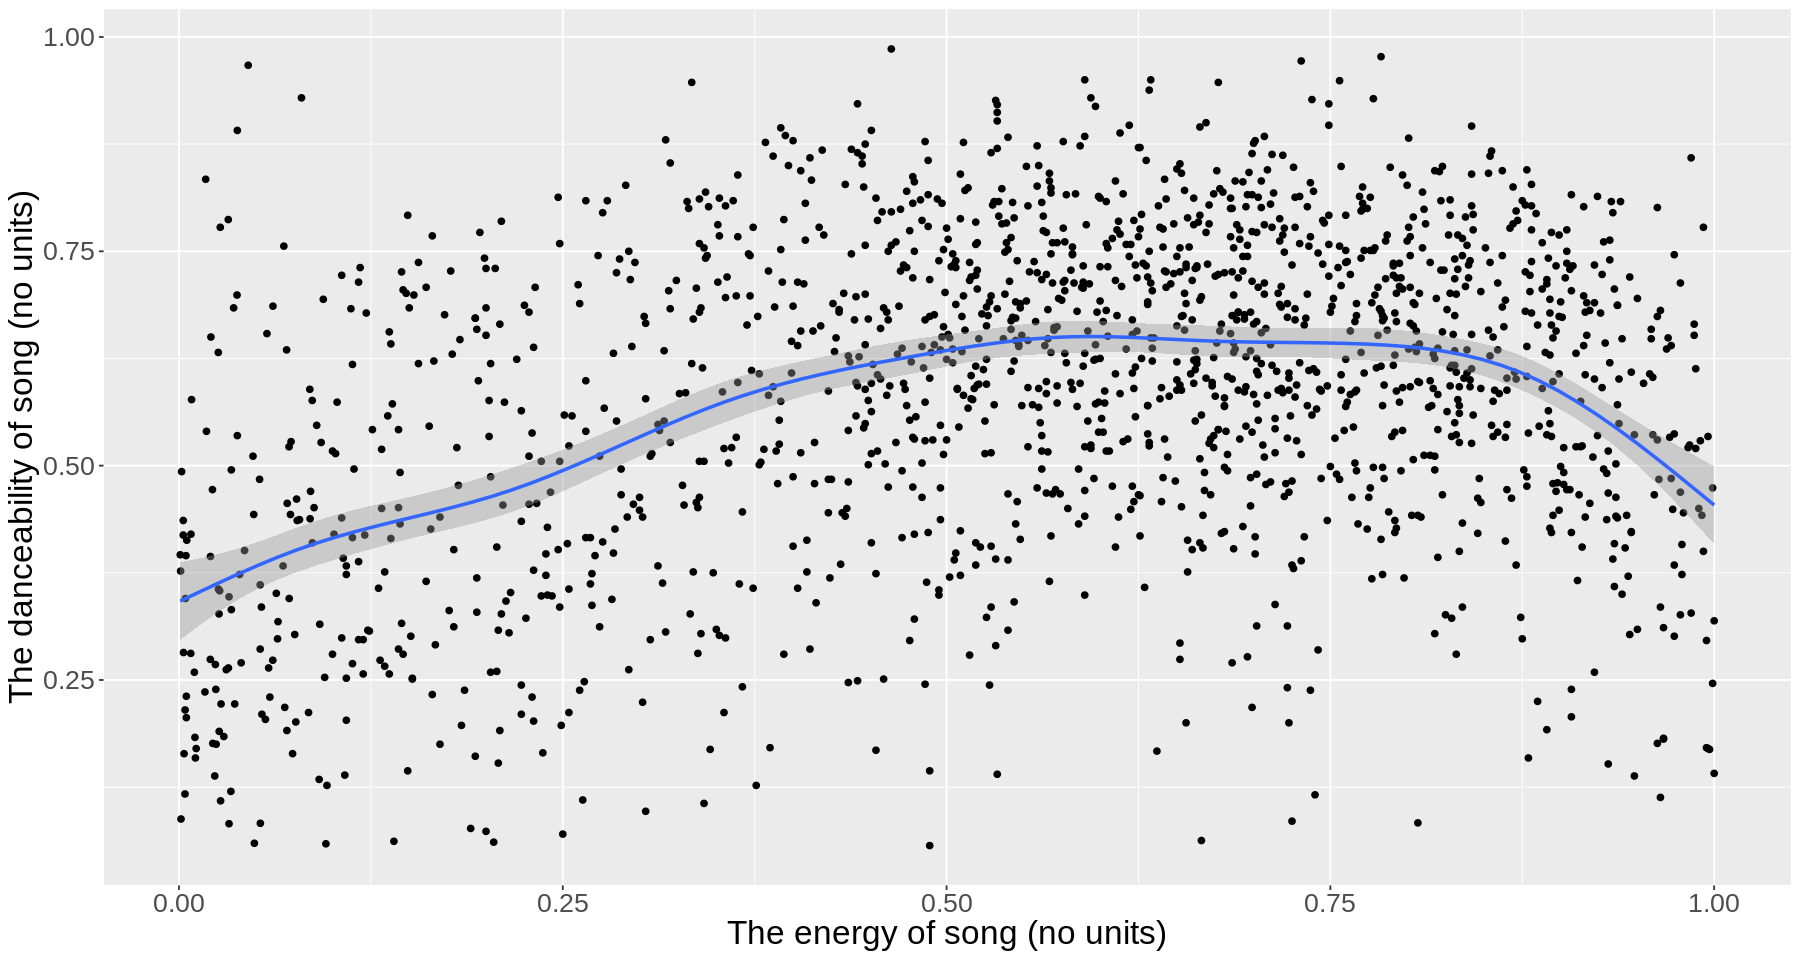

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



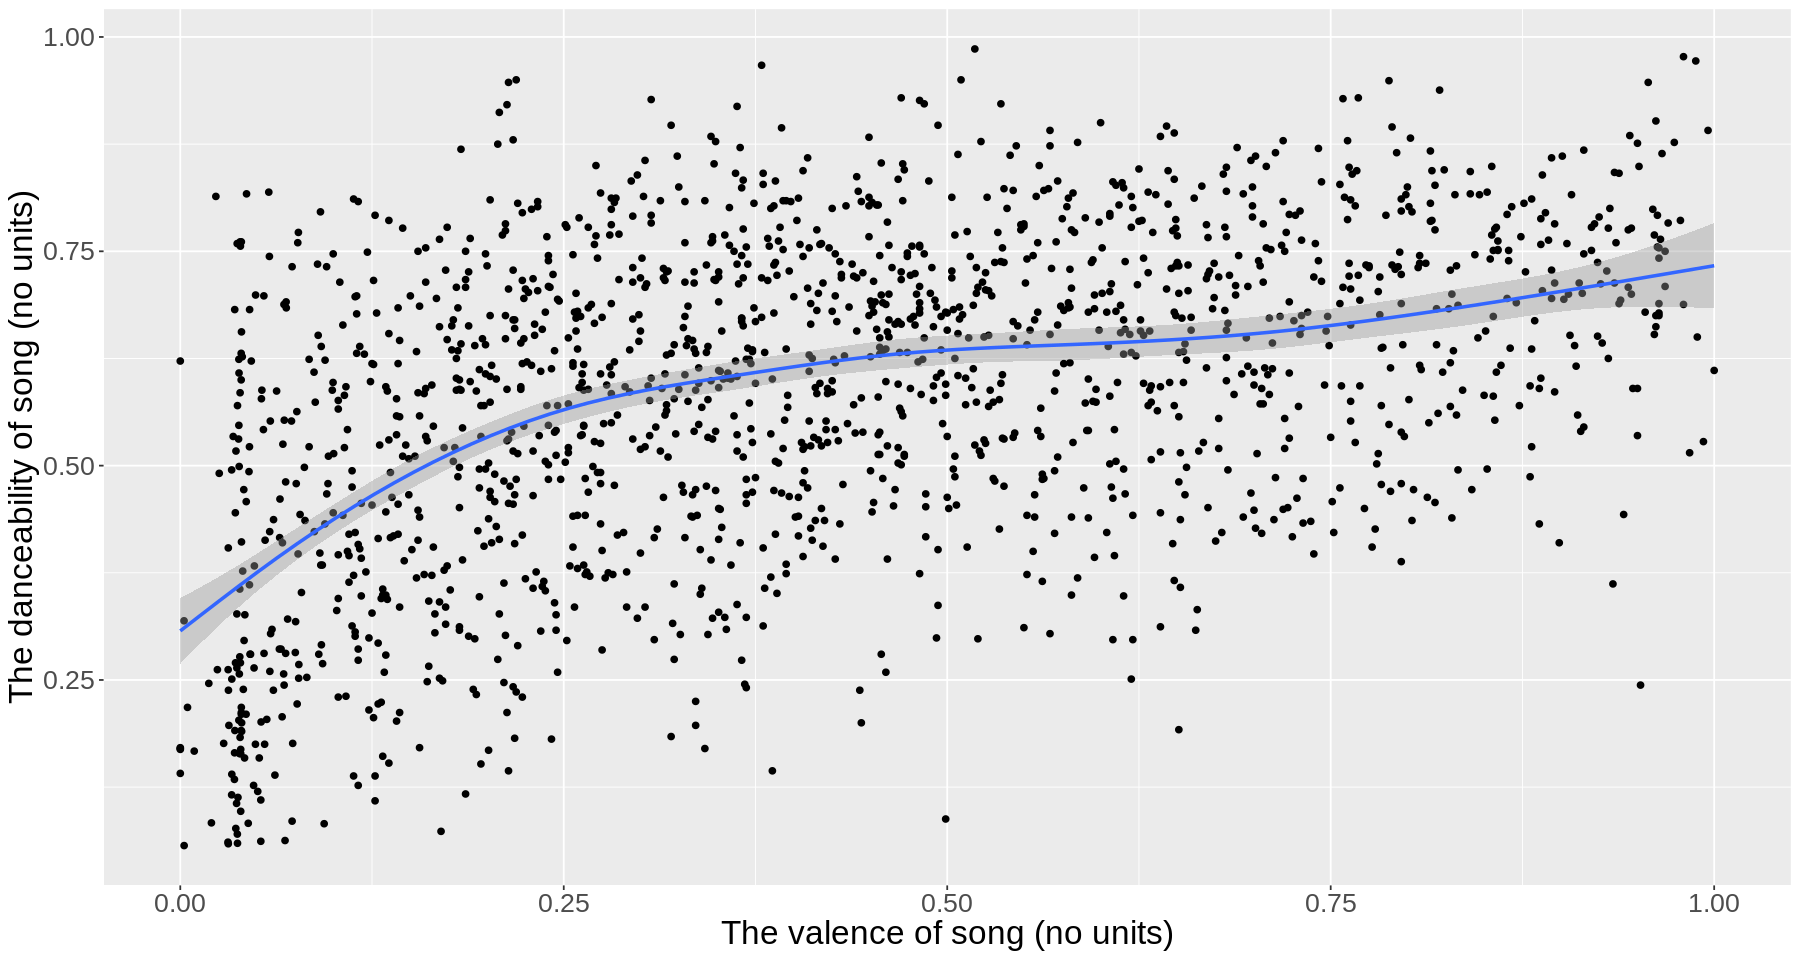

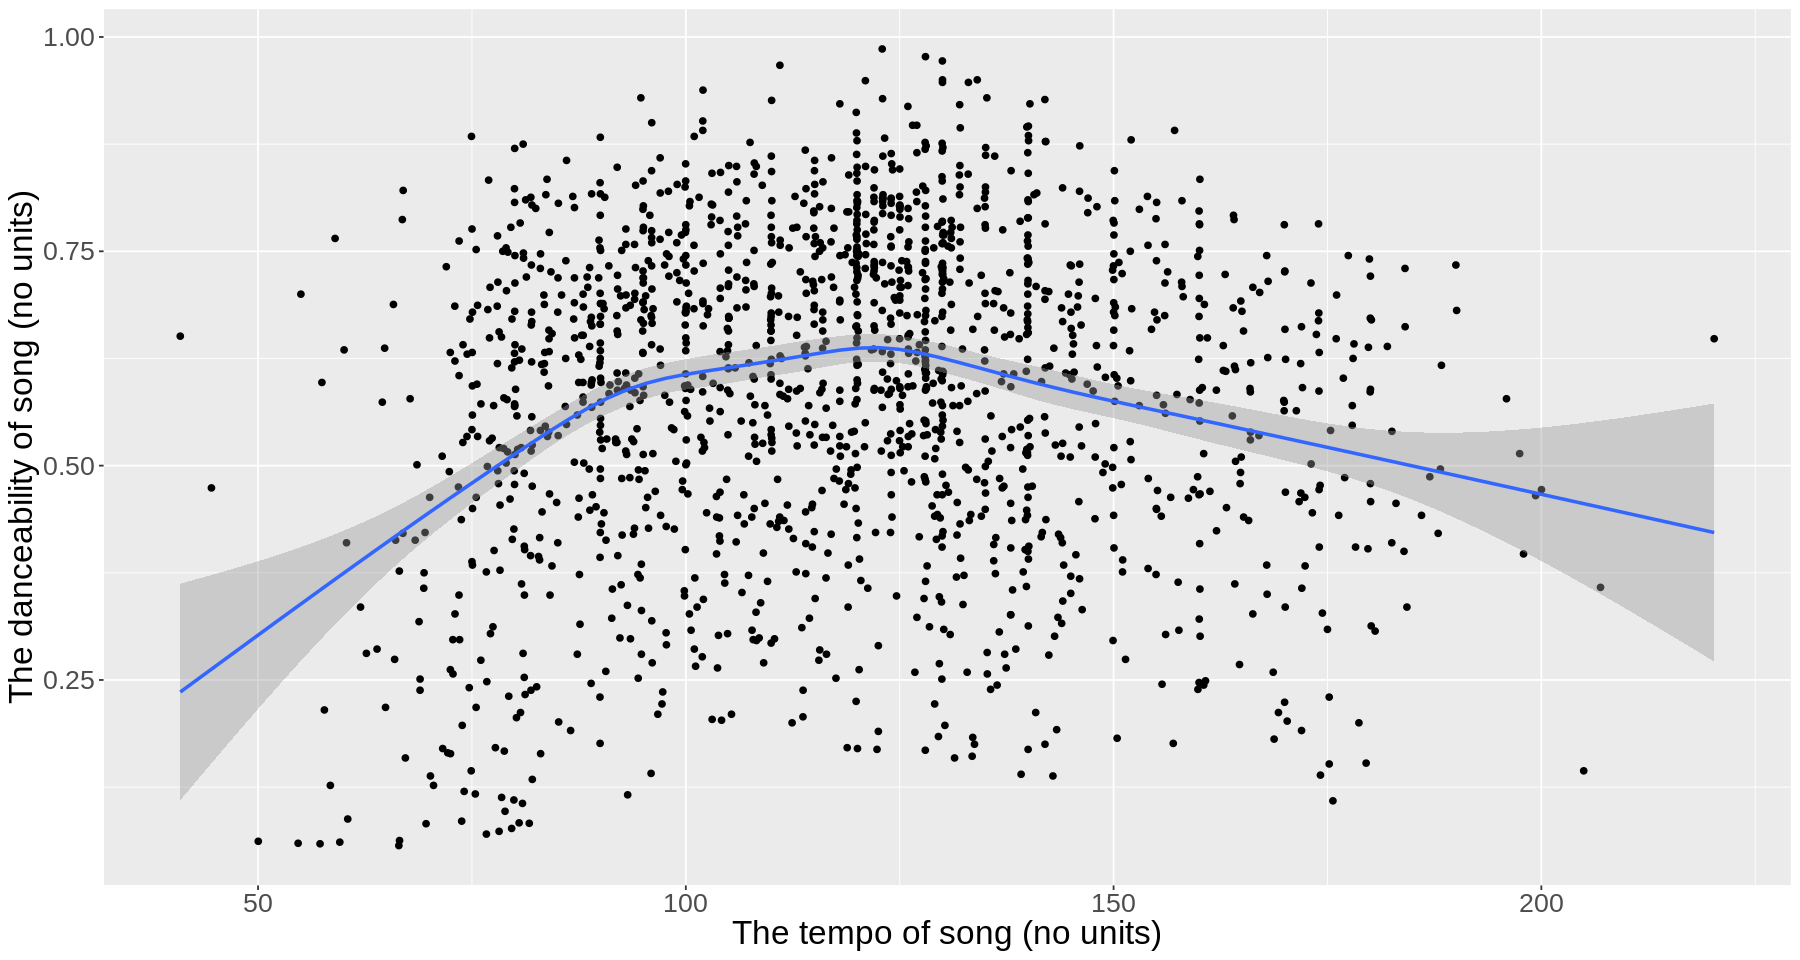

In [11]:
# ========== General Visualizations for Intuitive Model predictors ==========
options(repr.plot.width = 15, repr.plot.height = 8)
# Visualize the relationship between danceability and energy, classified by mode
ggplot(spotify_training_intuitive_unscaled, aes(x = energy, y = danceability)) +
    geom_point(alpha = 1.1) +
    geom_smooth() +
    labs(x = "The energy of song (no units)", y = "The danceability of song (no units)") +
    theme(text = element_text(size = 20)) +
    scale_color_brewer(palette = "Set2")

# Visualize the relationship between danceability and valence, classified by mode
ggplot(spotify_training_intuitive_unscaled, aes(x = valence, y = danceability)) +
    geom_point(alpha = 1.1) +
    geom_smooth() +
    labs(x = "The valence of song (no units)", y = "The danceability of song (no units)") +
    theme(text = element_text(size = 20)) +
    scale_color_brewer(palette = "Set1")

# Visualize the relationship between danceability and tempo, classified by mode
ggplot(spotify_training_intuitive_unscaled, aes(x = tempo, y = danceability)) +
    geom_point(alpha = 1.1) +
    geom_smooth() +
    labs(x = "The tempo of song (no units)", y = "The danceability of song (no units)") +
    theme(text = element_text(size = 20)) +
    scale_color_brewer(palette = "Dark2")

Although we are working with a lot of data and hence are prone to overplotting in these visualizations, the general trend outlined by the `geom_smooth()` line is noticeable for the energy and valence of a song. For tempo, the trend is discernible, but not quite as obvious.

### <span style="color:#00bfff">Systematic Model</span>

The first stage of filtering the data needed for the regression model is to select all possible continuous and categorical variables that will be most effective for the model.
Since we might conduct cross-validation to compare this model with others in future, a categorical variable with many levels will greatly affect the performance of it. Hence, we will first remove `key` and `time_signature` from our analysis.

In [12]:
# ========== Removing large categorical variables ==========
spotify_training_systematic_filter_stage_1 <- spotify_training |>
                                               select(-key, -time_signature)
head(spotify_training_systematic_filter_stage_1, 5)

acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
8.97e-01,0.212,150857,0.254,0.8370,0.111,-20.003,0,0.0487,140.897,0.0398
9.91e-01,0.451,94000,0.143,0.9270,0.107,-25.762,1,0.0740,114.721,0.1820
1.82e-05,0.449,167226,0.973,0.0581,0.374,-3.786,1,0.0837,155.023,0.7190
9.15e-01,0.409,182107,0.253,0.0278,0.104,-9.880,0,0.0363,114.023,0.2180
4.54e-02,0.417,39070,0.733,0.0000,0.710,-10.404,1,0.2940,141.536,0.7250


Next, we will use `ggpairs()` and the correlation matrix to check the strength of the relationships between each variable and danceability. For plotting simplicity, we will first ignore `mode` as it is the only categorical variable remaining.

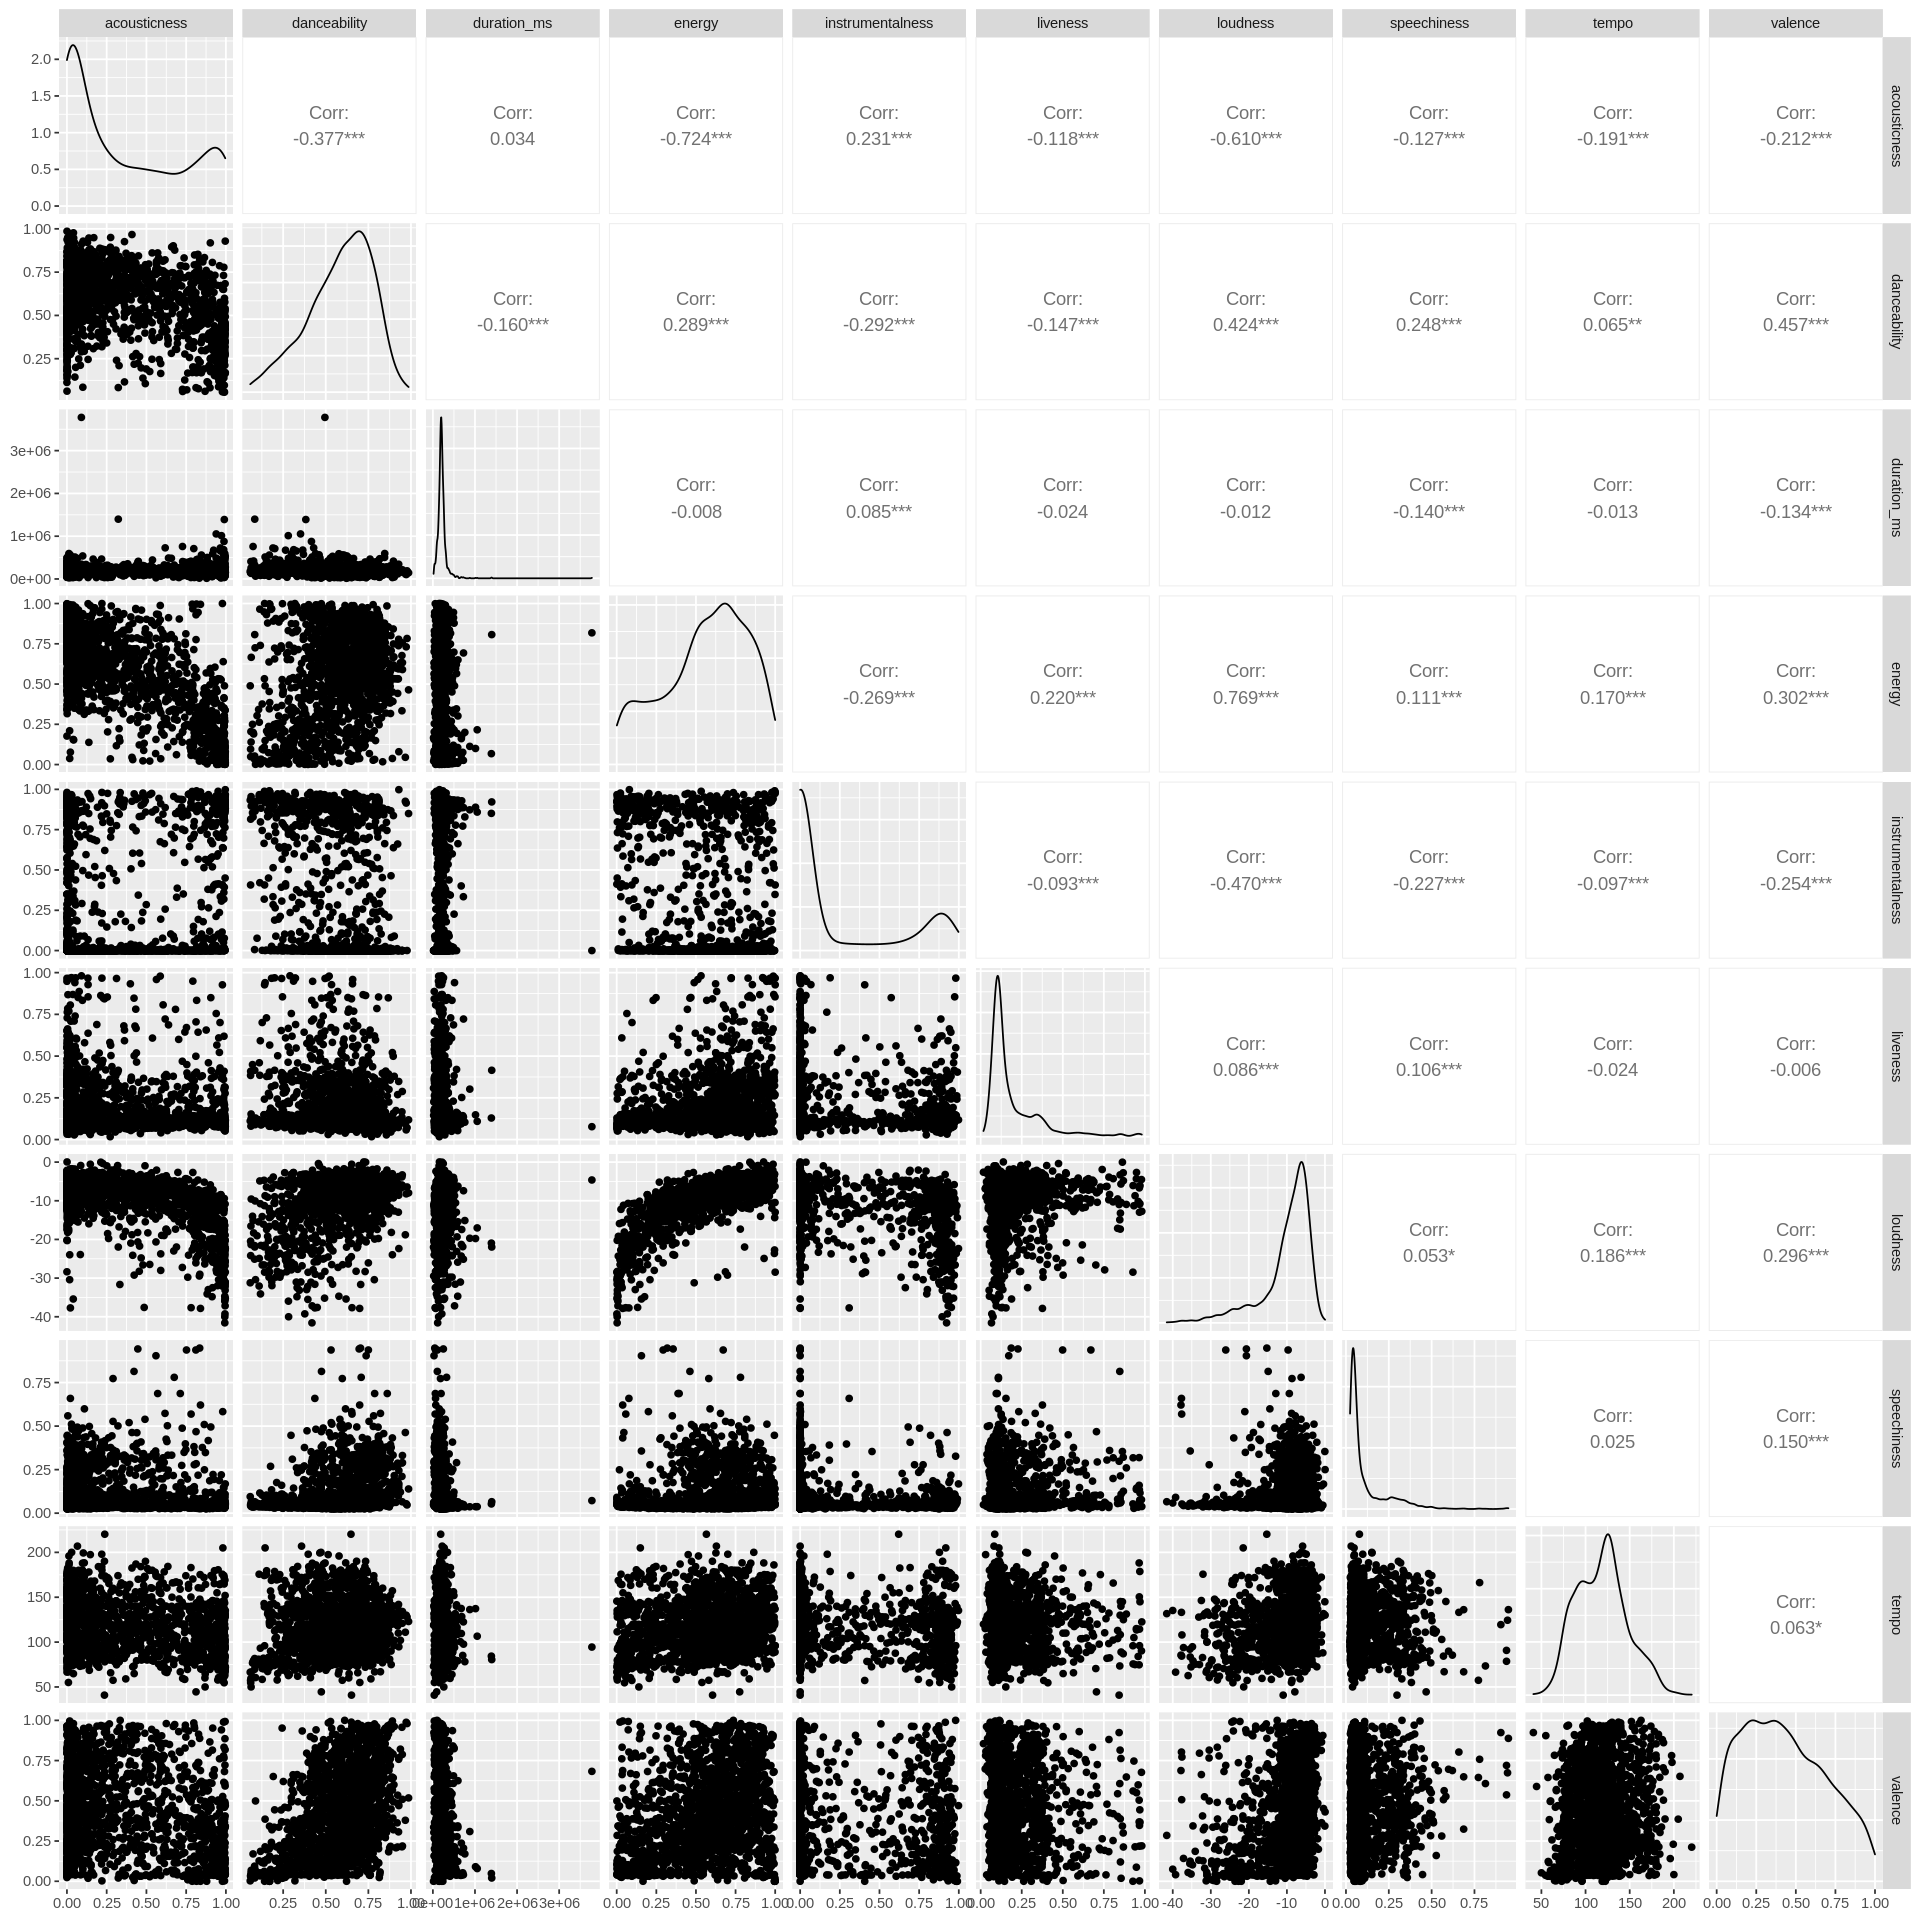

In [13]:
# ========== Create a ggpairs plot with all continuous variables ==========
options(repr.plot.width = 16, repr.plot.height = 16)
spotify_training_systematic_continuous <- spotify_training_systematic_filter_stage_1 |> select(-mode)
systematic_relationship_check_graph <- ggpairs(spotify_training_systematic_continuous)
systematic_relationship_check_matrix <- cor(spotify_training_systematic_continuous)

systematic_relationship_check_graph

In [16]:
# ========== Show the correlation matrix ==========
systematic_relationship_check_matrix

# show only variables against danceability
systematic_relationship_check_matrix[2,]

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,1.00000000,-0.3774612,0.033726042,-0.723957382,0.23086151,-0.11792656,-0.61019366,-0.1265897,-0.19129753,-0.2116819
danceability,-0.37746119,1.0000000,-0.159876642,0.288602272,-0.29158477,-0.14716910,0.42355995,0.2480486,0.06524669,0.4570291
duration_ms,0.03372604,-0.1598766,1.000000000,-0.008144273,0.08486741,-0.02406055,-0.01159307,-0.1401172,-0.01335215,-0.1340225
energy,-0.72395738,0.2886023,-0.008144273,1.000000000,-0.26900055,0.21964044,0.76905734,0.1109639,0.16957394,0.3017204
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
loudness,-0.6101937,0.42355995,-0.01159307,0.7690573,-0.4700360,0.086471106,1.00000000,0.05281911,0.18598232,0.29557798
speechiness,-0.1265897,0.24804855,-0.14011720,0.1109639,-0.2274675,0.105532343,0.05281911,1.00000000,0.02464738,0.15013398
tempo,-0.1912975,0.06524669,-0.01335215,0.1695739,-0.0974252,-0.024372007,0.18598232,0.02464738,1.00000000,0.06272626
valence,-0.2116819,0.45702908,-0.13402255,0.3017204,-0.2537023,-0.006393251,0.29557798,0.15013398,0.06272626,1.00000000


acousticness     danceability      duration_ms           energy 
     -0.37746119       1.00000000      -0.15987664       0.28860227 
instrumentalness         liveness         loudness      speechiness 
     -0.29158477      -0.14716910       0.42355995       0.24804855 
           tempo          valence 
      0.06524669       0.45702908

Based on the plot and matrix, we note that the variables with relatively strong correlations with danceability include `valence`, `loudness`, `acousticness`, `instrumentalness`, and `energy`. We also select `mode` as one of the potential variables that can predict danceability.

In [17]:
spotify_training_systematic <- spotify_training_systematic_filter_stage_1 |>
                                    select(danceability, valence, loudness, acousticness,
                                           instrumentalness, energy, mode)

spotify_training_systematic

danceability,valence,loudness,acousticness,instrumentalness,energy,mode
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.212,0.0398,-20.003,8.97e-01,0.8370,0.254,0
0.451,0.1820,-25.762,9.91e-01,0.9270,0.143,1
0.449,0.7190,-3.786,1.82e-05,0.0581,0.973,1
0.409,0.2180,-9.880,9.15e-01,0.0278,0.253,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.788,0.887,-8.763,0.0198,2.14e-02,0.509,1
0.884,0.346,-4.886,0.0195,0.00e+00,0.590,1
0.777,0.145,-7.000,0.3470,4.16e-06,0.500,1
0.734,0.790,-2.401,0.0034,9.22e-05,0.922,1


<h2 style="color:#008a05">Data Analysis</h2>

### <span style="color:#e61a17">Intuitive Model</span>

In [ ]:
# This part is all yours, Zeen! :D
# I fixed the code to use the right data frames but as of right now it's broken because we have mode :(
# we'll have to fix that later!

In [11]:
# Perform k-nn regression algorithm
# create spec + tune()
spotify_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("regression")

# create recipe
spotify_recipe <- recipe(danceability ~ ., data = spotify_training_intuitive_unscaled) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# perform cross-validation
spotify_vfold <- vfold_cv(spotify_training_intuitive_unscaled, v = 5, strata = danceability)
spotify_workflow <- workflow() |>
    add_recipe(spotify_recipe) |>
    add_model(spotify_spec)
spotify_workflow

# create workflow + gridvals <- tibble(neighbors = seq(1, 400))
gridvals <- tibble(neighbors = seq(1, 200))
spotify_results <- spotify_workflow |>
    tune_grid(resamples = spotify_vfold, grid = gridvals) |>
    collect_metrics()
spotify_results

# output results + pick out best result as k_min
spotify_min <- spotify_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    slice(1)
spotify_min 

# k_min <- spotify_min |> 
#     pull(neighbors)

# # retrain everything + find rmse
# spotify_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
#     set_engine("kknn") |>
#     set_mode("regression")

# spotify_best_fit <- workflow() |>
#     add_recipe(spotify_recipe) |>
#     add_model(spotify_best_spec) |>
#     fit(data = spotify_training_intuitive_unscaled)

# spotify_summary <- spotify_best_fit |>
#     predict(spotify_testing_cleaned) |>
#     bind_cols(spotify_testing_cleaned) |>
#     metrics(truth = danceability, estimate = .pred)
# spotify_summary

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.2009303,5,0.002522923,Preprocessor1_Model001
1,rsq,standard,0.1658383,5,0.012410122,Preprocessor1_Model001
2,rmse,standard,0.1756991,5,0.001575655,Preprocessor1_Model002
2,rsq,standard,0.2318043,5,0.010892456,Preprocessor1_Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
199,rmse,standard,0.1583008,5,0.001426734,Preprocessor1_Model199
199,rsq,standard,0.3368101,5,0.016571177,Preprocessor1_Model199
200,rmse,standard,0.1583545,5,0.001428636,Preprocessor1_Model200
200,rsq,standard,0.3363396,5,0.016512562,Preprocessor1_Model200


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
51,rmse,standard,0.1491542,5,0.001111924,Preprocessor1_Model051


In [12]:
spotify_min <- spotify_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    slice(1)
spotify_min 

k_min <- spotify_min |> 
    pull(neighbors)
    # retrain everything + find rmse
spotify_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

spotify_best_fit <- workflow() |>
    add_recipe(spotify_recipe) |>
    add_model(spotify_best_spec) |>
    fit(data = spotify_training_intuitive_unscaled)

spotify_testing_cleaned <- spotify_testing |>
    select(danceability, energy, valence, tempo)

spotify_summary <- spotify_best_fit |>
    predict(spotify_testing_cleaned) |>
    bind_cols(spotify_testing_cleaned) |>
    metrics(truth = danceability, estimate = .pred)
spotify_summary

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
51,rmse,standard,0.1491542,5,0.001111924,Preprocessor1_Model051


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.1417535
rsq,standard,0.4507596
mae,standard,0.1133621


### <span style="color:#00bfff">Systematic Model</span>

In [8]:
# we are not going to center and scale the data since it will not affect the performance of the linear regression

# however, considering that there is no single variable that has a correlation coefficient larger than 0.5
# with the danceability, it will be quite arbitrary and unvalid to use the full model or a random subset of
# the predictors directly, and thus we would conduct greedy selection to find the best subset of variables

# specfically, since the dimension here is not so high, we will not use the "forward selection" version, but the "all subsets" version

library(leaps)
full_model <- regsubsets(danceability ~ ., data = spotify_training_cleaned)
# show the best models under each dimension
summary(full_model)

Subset selection object
Call: regsubsets.formula(danceability ~ ., data = spotify_training_cleaned)
6 Variables  (and intercept)
                 Forced in Forced out
acousticness         FALSE      FALSE
loudness             FALSE      FALSE
valence              FALSE      FALSE
instrumentalness     FALSE      FALSE
energy               FALSE      FALSE
mode                 FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: exhaustive
         acousticness loudness valence instrumentalness energy mode
1  ( 1 ) " "          " "      "*"     " "              " "    " " 
2  ( 1 ) " "          "*"      "*"     " "              " "    " " 
3  ( 1 ) "*"          "*"      "*"     " "              " "    " " 
4  ( 1 ) "*"          "*"      "*"     " "              "*"    " " 
5  ( 1 ) "*"          "*"      "*"     " "              "*"    "*" 
6  ( 1 ) "*"          "*"      "*"     "*"              "*"    "*" 

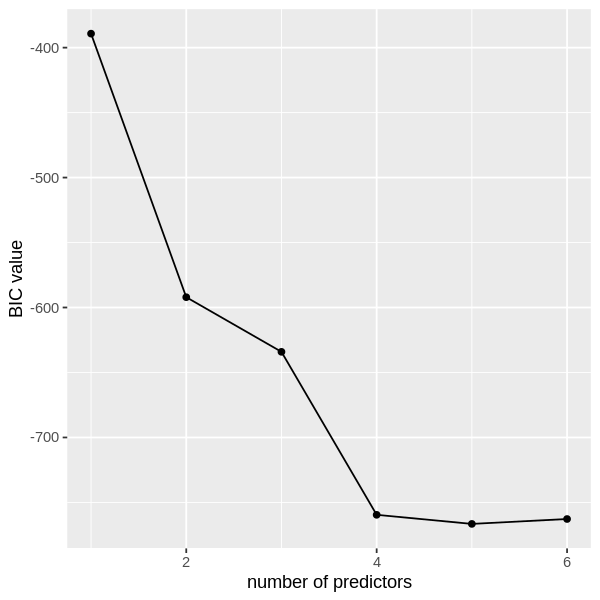

In [9]:
# now we are going to pick the best model under all dimensions
# similar to cross-validation, BIC or Mallow's Cp value are also critertion that estimate the predition error
# therefore, we are going to BIC accross all the potential best models to pick the final one

BIC_tibble <- tibble(number_of_predictors = 1:6,
                     BIC_value = summary(full_model)$bic)

# plot the BIC value against dimension
BIC_plot <- ggplot(data = BIC_tibble,
                   aes(x=number_of_predictors,
                       y=BIC_value))+
            geom_point()+
            geom_line()+
            labs(x="number of predictors", y="BIC value")
options(repr.plot.width = 5, repr.plot.height = 5)
BIC_plot

In [10]:
# since the BIC value is an estimate of the predicton error, we prefer a lower BIC value
# and thus the optimal dimension by BIC should be 5
# based on the summary of our greedy selection, the predictors we should include are
# all but instrumentalness

spotify_training_optimal <- spotify_training_cleaned |> select(-instrumentalness)
optimal_model <- lm(danceability~., data = spotify_training_optimal)

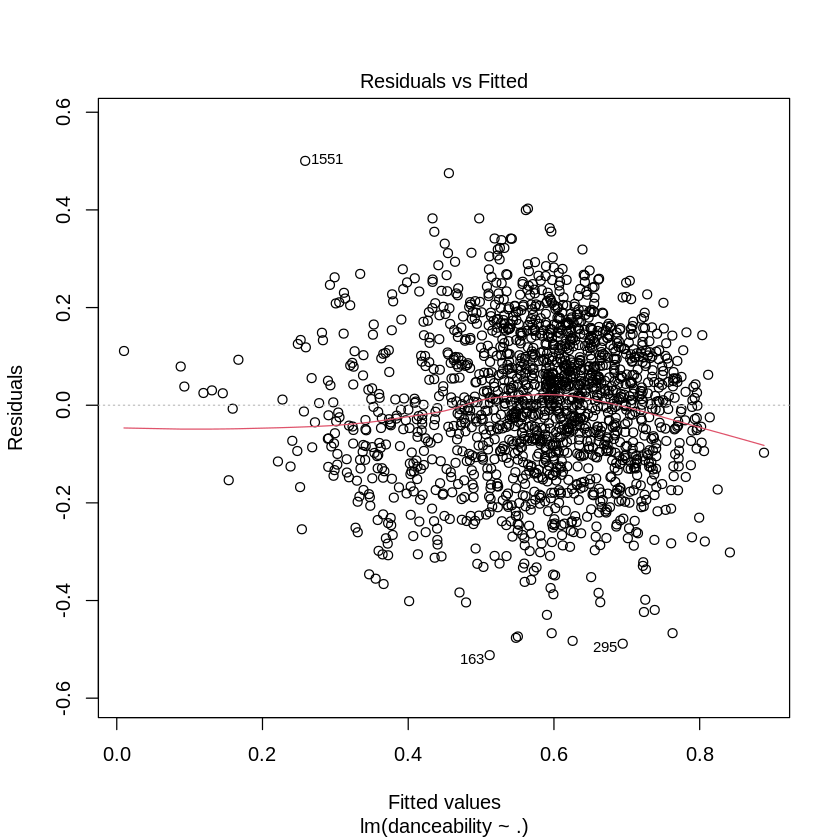

NULL

NULL

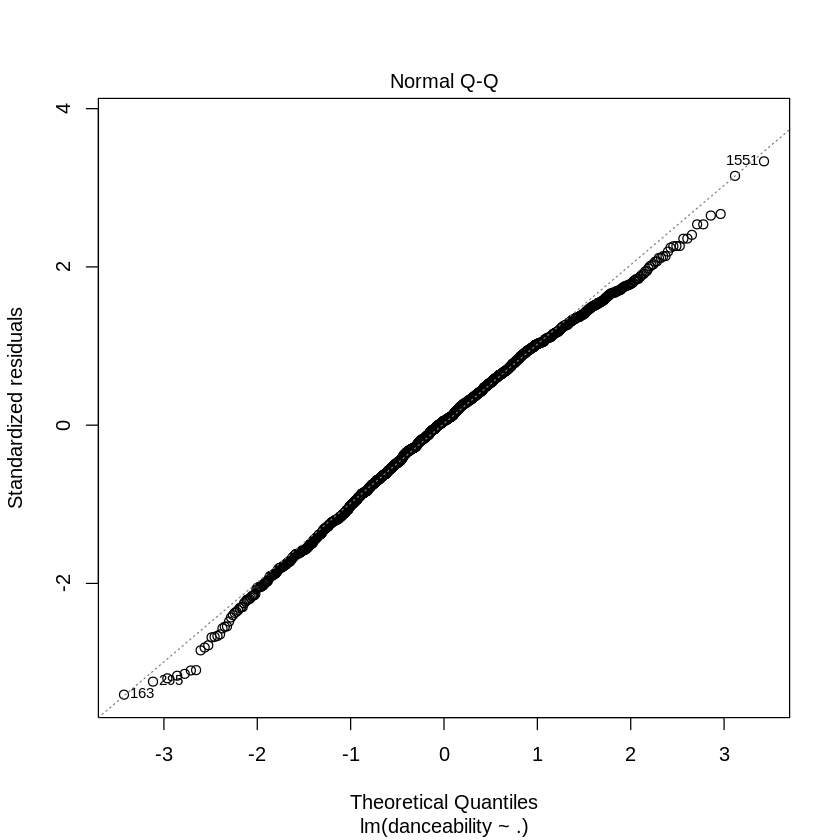

In [11]:
# check the residual plot and qqplot, so as to test the special pattern of data
# and the normality of residuals
options(repr.plot.width = 7, repr.plot.height = 7)
residual_plot <- plot(optimal_model, which = 1)
ggplot <- plot(optimal_model, which = 2)
residual_plot
ggplot

In [12]:
# since there is no apparent pattern of residuals and the qqplot is approximately a straight line
# the validity of the model is proven approximately

# then we are going to check the performance of the model on the test set
prediction_test <- predict(optimal_model, newdata = spotify_testing) |> as_tibble()
colnames(prediction_test) <- c("prediction")
# then append the prediction result to the original testing set
spotify_testing_complete <- cbind(spotify_testing, prediction_test)
# compute the rmse on the training set
RMSE_regression <- with(spotify_testing_complete, sqrt(mean((prediction-danceability)^2)))
RMSE_regression

[1] 0.1550544

<h2 style="color:#008a05">Results and Discussion</h2>

In [13]:
# ========== Forward Selection Difficulties: ==========

# However, there are some limitations of the current optimal regression model

# firstly, we didn't do any feature mapping and generation procedure, and thus it is possible that we can 
# improve our model further by adding more quadratic terms or interaction terms

# secondly, we are using BIC criterion as an estimate of prediction error, and 
# there are actually multiple choices of it, so we change the way of estimating then the result might be 
# slightly different.

# thirdly, the first stage of filtering is conducted under intuition, and so actually some of the useful information
# might have been ignored.



We expect that an appropriate model will be developed to incorporate our predictor variables—valence, mode, tempo, and energy—to predict the danceability of an unknown song. The results of this study could assist musicians who desire to create danceable music according to specific characteristics. This finding could assist them in identifying and selecting danceable features of the song before creating it, thus increasing the likelihood of a successful composition.

Further, this study raises several interesting questions. For instance:
- How do other variables, like a song’s length, its key, or how wordy it is, affect its danceability?
- Is popularity based primarily on how danceable a song is?
- Since the danceability variable, per Spotify, is a combination of factors like beat strength, regularity, and stability, is it an unbiased, objective variable?
- Could the danceability of a song be viewed differently across regions, cultures, and societies?

<br><br><br>
*Thank you! - Group 79*